# Devoir H23

Avant de commencer les analyses nous devons obtenir un ensemble personnalisé de données grâce à l'un de nos matricules. 

In [72]:
import pandas as pd
import random

random.seed(2051829)
df = pd.read_csv("DevoirDH23.csv", sep=";", decimal=",")
df = df.iloc[random.sample(range(290), 195), 1:]

## Partie 1 a)


### Histogramme

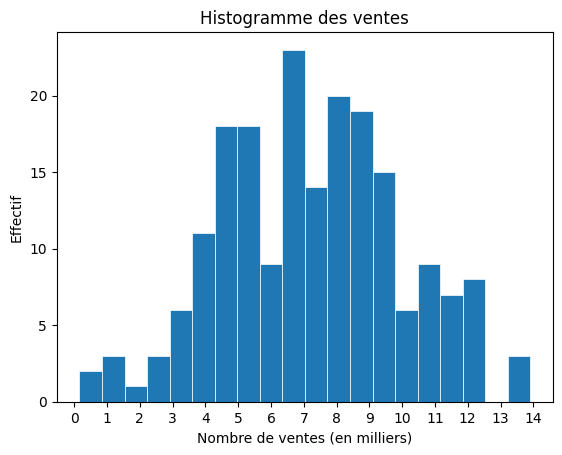

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.hist(df["Sales"], bins=20, linewidth=0.5, edgecolor="white")
ax.set_xticks(np.arange(0, 15, 1))
ax.set_title("Histogramme des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_ylabel("Effectif")

plt.show()

Comme nous pouvons le voir avec cet histogramme, la plupart des points de ventes vendent entre 4500 et 9000 sièges. 

### Diagramme de Tukey

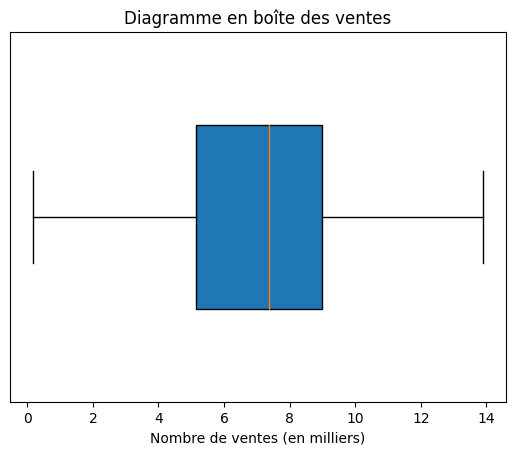

In [74]:
fig, ax = plt.subplots()
ax.boxplot(df['Sales'], vert=False, patch_artist=True,
            manage_ticks=True, widths=0.5,
            showmeans=False, showfliers=False,)
ax.set_title("Diagramme en boîte des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_yticks([])

plt.show()

Les conclusions que l’on peut tirer de ce diagramme de Tukey confirment, ce que nous montre déjà l’histogramme. On peut préciser que l’IQR est relativement faible par rapport à l’étendue de l’échantillon. Ce qui affirme donc bien que la majorité des points de vente vendent entre 4500 et 9000 sièges.

### Droite de Henry

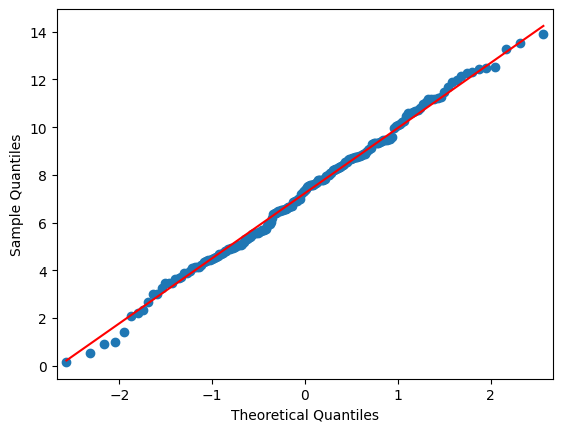

In [75]:
import statsmodels.graphics.gofplots as sm
fig, ax = plt.subplots()
sm.ProbPlot(df['Sales']).qqplot(line='s', ax=ax)
plt.show()


La droite de Henry nous montres que la distribution des ventes semble être proche d'une distribution normale.
Vérifions ça avec un test de normalité.

### Test de Shapiro-Wilk

In [76]:
import scipy.stats as stats
W, p = stats.shapiro(df['Sales'])

print(f'W :{W}, p-value : {p}')
if p > 0.05:
    print("La distribution des ventes suit une loi normale")
else:
    print("La distribution des ventes ne suit pas une loi normale")

W :0.9945443272590637, p-value : 0.6997796297073364
La distribution des ventes suit une loi normale


D'après les résultats précédents on peut déduire que la distribution des ventes de notre échantillon suit une loi normale.

### Tableau de statistiques descriptives

In [77]:
mean = df['Sales'].mean()
std = df['Sales'].std()
interval = stats.norm.interval(confidence=0.95, loc=mean, scale=stats.sem(df['Sales']))
interval = [round(x, 2) for x in interval]
table = pd.DataFrame({'Moyenne': [mean], 'Ecart-type': [std], 'Intervalle de confiance': [interval]})

table

,Moyenne,Ecart-type,Intervalle de confiance
0,7.233538,2.73685,"[6.85, 7.62]"


Voici ci-dessous le tableau contenant la moyenne l'écart-type et l'intervalle de confiance à 95% de la moyenne

## Partie 1 b)

### Histogrammes

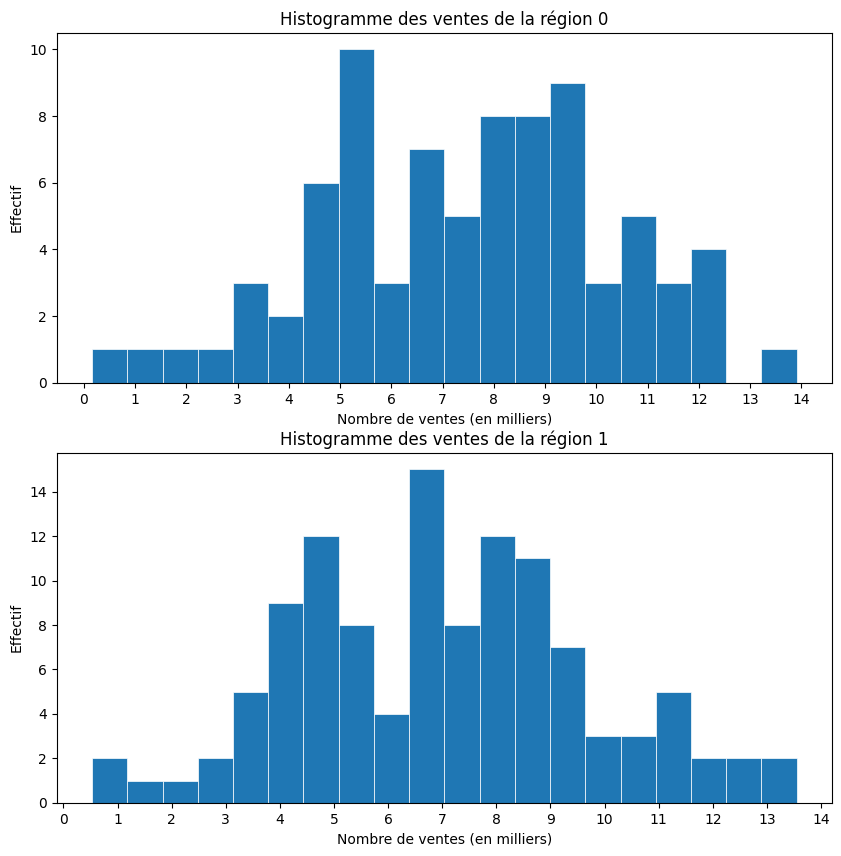

In [87]:
region0 = df.loc[df['Region'] == 0, 'Sales']
region1 = df.loc[df['Region'] == 1, 'Sales']
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].hist(region0, bins=20, linewidth=0.5, edgecolor="white")
ax[0].set_xticks(np.arange(0, 15, 1))
ax[0].set_title("Histogramme des ventes de la région 0")
ax[0].set_xlabel("Nombre de ventes (en milliers)")
ax[0].set_ylabel("Effectif")

ax[1].hist(region1, bins=20, linewidth=0.5, edgecolor="white")
ax[1].set_xticks(np.arange(0, 15, 1))
ax[1].set_title("Histogramme des ventes de la région 1")
ax[1].set_xlabel("Nombre de ventes (en milliers)")
ax[1].set_ylabel("Effectif")

plt.show()

On remarque une distribution légèrement différentes entres les deux régions

### Diagrammes de Tukey

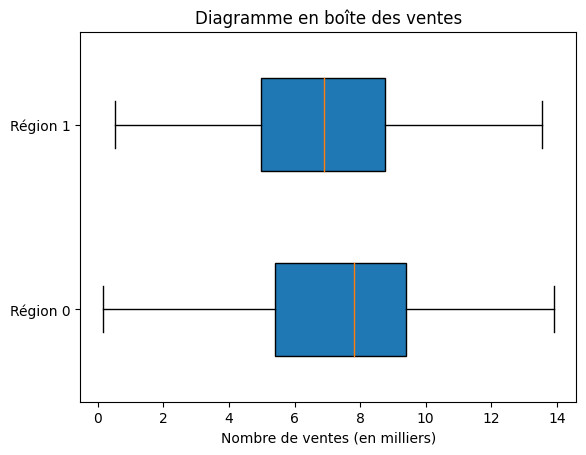

In [98]:
fig, ax = plt.subplots()
ax.boxplot([region0, region1], vert=False, patch_artist=True,
            manage_ticks=True, widths=0.5,
            showmeans=False, showfliers=False,)
ax.set_title("Diagramme en boîte des ventes")
ax.set_xlabel("Nombre de ventes (en milliers)")
ax.set_yticks([1, 2])
ax.set_yticklabels(['Région 0', 'Région 1'])

plt.show()